<a href="https://colab.research.google.com/github/BALAJIHARIDASAN/Deep-Learning/blob/main/Artificial_neural_network_using_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:


fashion = tf.keras.datasets.fashion_mnist

In [4]:

(X_train,y_train),(X_test,y_test) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:

X_valid,X_train = X_train[:5000]/255,X_train[5000:]/255


In [6]:

y_valid,y_train= y_train[:5000],y_train[5000:]
     

In [7]:

X_test = X_test/255

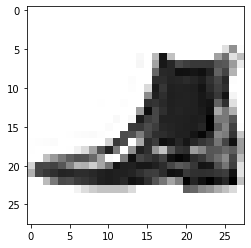

In [8]:


plt.imshow(X_train[5],cmap = 'binary')
plt.show()

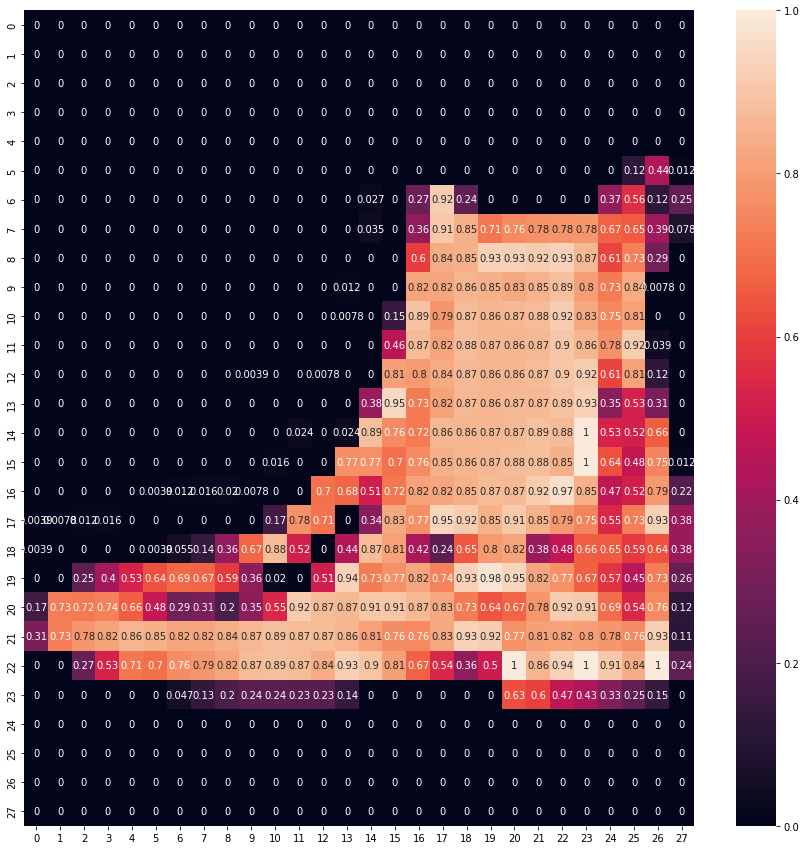

In [9]:

import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(X_train[5],annot = True)
plt.show()

In [10]:

# simple Ann Model 

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [11]:


model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:


model.layers

In [13]:

LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZERS = 'SGD'
METRICS = ['accuracy']
     

In [14]:


from tensorflow._api.v2.config import optimizer
model.compile(loss = LOSS_FUNCTION,optimizer= OPTIMIZERS,metrics = METRICS)


In [15]:


EPOCHS = 20
VALIDATION_SET= (X_valid,y_valid)

history = model.fit(X_train,y_train,epochs = EPOCHS,validation_data = VALIDATION_SET)

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7137 - accuracy: 0.7668 - val_loss: 0.5058 - val_accuracy: 0.8286
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4864 - accuracy: 0.8313 - val_loss: 0.4577 - val_accuracy: 0.8390
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8451 - val_loss: 0.4233 - val_accuracy: 0.8556
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4155 - accuracy: 0.8530 - val_loss: 0.4042 - val_accuracy: 0.8658
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3956 - accuracy: 0.8604 - val_loss: 0.4012 - val_accuracy: 0.8624
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3790 - accuracy: 0.8647 - val_loss: 0.3799 - val_accuracy: 0.8684
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8705 - val_loss: 0.3615 - val_accuracy:

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8779


[0.3412156403064728, 0.8779000043869019]

In [17]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.713718,0.766800,0.505805,0.8286
1,0.486358,0.831309,0.457718,0.8390
2,0.442509,0.845145,0.423265,0.8556
3,0.415537,0.852982,0.404183,0.8658
4,0.395581,0.860400,0.401164,0.8624
5,0.378980,0.864691,0.379921,0.8684
6,0.365949,0.870509,0.361530,0.8742
7,0.355068,0.873091,0.357424,0.8770
8,0.343169,0.876800,0.356333,0.8798
9,0.335825,0.878436,0.340368,0.8800


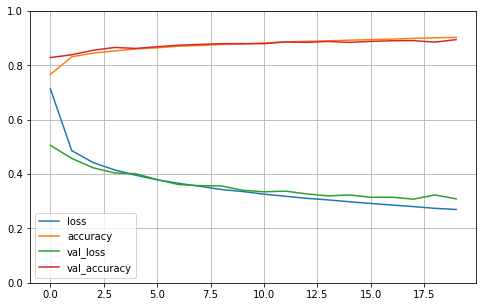

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
# approach 1


In [20]:
del model

In [24]:

from keras.layers import BatchNormalization

In [26]:
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(BatchNormalization())
model.add(Dense(300,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation = 'softmax'))
model.summary()
     

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_2 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_3 (Batc  (None, 100)             

In [27]:
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

4736

In [28]:
Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

2368.0

In [29]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

2368.0

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [31]:
EPOCHS = 20
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5277 - accuracy: 0.8165 - val_loss: 0.3849 - val_accuracy: 0.8626
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3956 - accuracy: 0.8607 - val_loss: 0.3432 - val_accuracy: 0.8776
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3532 - accuracy: 0.8718 - val_loss: 0.3287 - val_accuracy: 0.8818
Epoch 4/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3256 - accuracy: 0.8838 - val_loss: 0.3259 - val_accuracy: 0.8844
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3078 - accuracy: 0.8890 - val_loss: 0.3145 - val_accuracy: 0.8892
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2880 - accuracy: 0.8946 - val_loss: 0.3159 - val_accuracy: 0.8860
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2752 - accuracy: 0.8999 - val_loss: 0.3112 - val_accuracy:

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8876


[0.34433671832084656, 0.8876000046730042]

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.527676,0.816491,0.384874,0.8626
1,0.395618,0.860673,0.343211,0.8776
2,0.353196,0.871764,0.328695,0.8818
3,0.325584,0.883836,0.325888,0.8844
4,0.307825,0.889018,0.314500,0.8892
5,0.288005,0.894582,0.315870,0.8860
6,0.275168,0.899927,0.311154,0.8892
7,0.263736,0.904327,0.304644,0.8938
8,0.251946,0.908327,0.312961,0.8910
9,0.242523,0.911855,0.316769,0.8930


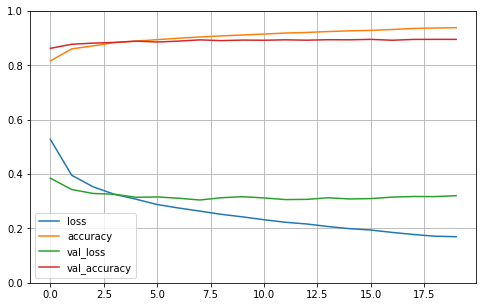

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
# approach 2

In [35]:
del model

In [42]:
LAYER_BN_TWO = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]
     

In [43]:
model = tf.keras.models.Sequential(LAYER_BN_TWO)

In [44]:
BN_layer_1 = model.layers[1]
BN_layer_1

In [45]:
for variable in BN_layer_1.variables:
  print(variable.name, variable.trainable)

batch_normalization_14/gamma:0 True
batch_normalization_14/beta:0 True
batch_normalization_14/moving_mean:0 False
batch_normalization_14/moving_variance:0 False


In [46]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_14 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_15 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 hiddenLayer2 (Dense)        (None, 100)             

In [47]:
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

4736

In [48]:
Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

2368.0

In [49]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

2368.0

In [50]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [51]:
EPOCHS = 20
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5900 - accuracy: 0.8016 - val_loss: 0.3899 - val_accuracy: 0.8650
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4114 - accuracy: 0.8563 - val_loss: 0.3507 - val_accuracy: 0.8744
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3695 - accuracy: 0.8698 - val_loss: 0.3344 - val_accuracy: 0.8824
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3423 - accuracy: 0.8788 - val_loss: 0.3232 - val_accuracy: 0.8810
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3199 - accuracy: 0.8845 - val_loss: 0.3134 - val_accuracy: 0.8842
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3047 - accuracy: 0.8911 - val_loss: 0.3099 - val_accuracy: 0.8892
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2885 - accuracy: 0.8970 - val_loss: 0.3008 - val_accuracy:

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8883


[0.3345930278301239, 0.8883000016212463]

In [53]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.589978,0.801582,0.389916,0.8650
1,0.411357,0.856327,0.350690,0.8744
2,0.369473,0.869764,0.334434,0.8824
3,0.342257,0.878764,0.323185,0.8810
4,0.319950,0.884545,0.313427,0.8842
5,0.304671,0.891091,0.309850,0.8892
6,0.288528,0.897000,0.300813,0.8888
7,0.276127,0.901455,0.303237,0.8826
8,0.265010,0.903673,0.298155,0.8896
9,0.251995,0.907582,0.293638,0.8890


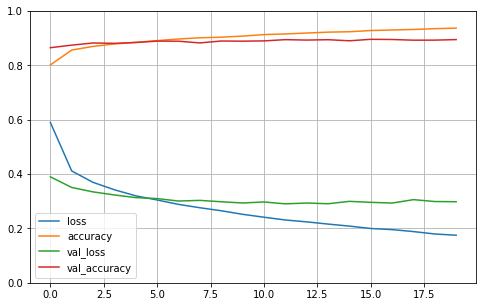

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()